## Last class

![](img/fig6.png)

# Unsupervised Learning
**by: Santiago Hincapie-Potes**

## Unsupervised vs Supervised
### Supervised
* More accurate
* Labeled data required
* Requieres human in the loop
### Unsupervised
* Less accurate
* No labeled data required
* Minimal human effort

## Today
* Clustering
* Dimensionality Reduction

## Cluster Analysis
Finding groups of objects such that the objects in a group will be similar (or related) to one another and different from (or unrelated to) the objects in other groups

Central to all of the goals of cluster analysis is the notion of the degree of similarity (or dissimilarity) between the individual objects being clustered.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import Utils.mlutils as mlutils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering, DBSCAN
from IPython.display import HTML

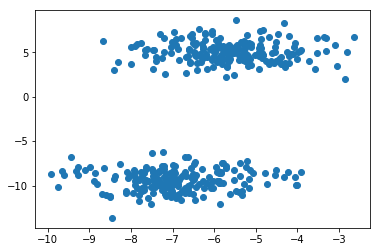

In [2]:
X, y = make_blobs(400, centers=2, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1]);

* What clusters would you do with the following data? 
* What would the process be like?

## Centroid-based clustering
Clusters are represented by a central vector, which may not necessarily be a member of the data set.

### K-means clustering
Defines a cluster in terms of a centroid, which is usually the mean of a group of points, and is typically applied to objects in a continous $n-$dimensional space.

### Algorithm

```python
def KMeans(data, K):
    centroids = select_initial(data, K)
    while centroids_do_not_change(centroids):
        clusters = form_clusters(K) # by assigning each point to its closest centroid
        centroids = [centroid(i) for i in clusters]
    return centroids, clusters
```

* Live coding? 
* Just continue

In [3]:
from sklearn.cluster import k_means

K = 2

km = KMeans(K)
km.fit(X)

y = km.predict(X)
print(y.shape, np.unique(y))

(400,) [0 1]


In [4]:
km.cluster_centers_

array([[-5.62340007,  5.05820822],
       [-6.93626035, -9.40862993]])

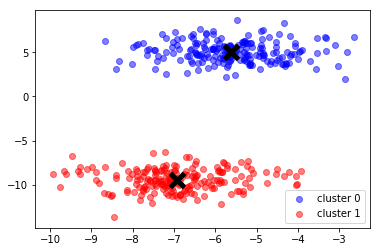

In [5]:
from Utils.lect4 import * 

plot_clusters(km, X, y)

## Evaluation
Most common measure is Sum of Squared Error (SSE)
* For each point, the error is the distance to the nearest cluster
* To get SSE, we square these errors and sum them.
$$ SSE = \sum_{i=1}^K\sum_{x\in C_i} dist^2(m_i, x) $$
* $x$ is a data point in cluster $C_i$ and $m_i$ is the representative point for cluster $C_i$
* Given two sets of clusters, we prefer the one with the smallest error

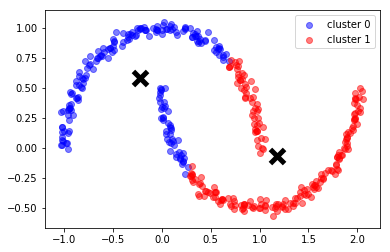

In [6]:
X, y = make_moons(400, noise=0.03)

K = 2

km = KMeans(K)
km.fit(X)

y = km.predict(X)

plot_clusters(km, X, y)

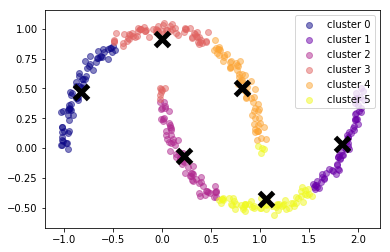

In [7]:
K = 6

km = KMeans(K)
km.fit(X)

y = km.predict(X)

plot_clusters(km, X, y)

## Limitations of K-means
* K-means has problems when clusters are of differing
     + Sizes
     + Densities 
     + Non-globular shapes

* K-means has problems when the data contains outliers.

## Connectivity-based (Hierarchical) Clustering
Produces a set of nested clusters organized as a hierarchical tree

### Strengths 
* Do not have to assume any particular number of clusters
* They may correspond to meaningful taxonomies

Two main types of hierarchical clustering
* **Agglomerative:** Start with the points as individual clusters and, at each step, merge the closest pair of clusters, a notion of cluster proximity is needed
* **Divisive:** Start with one, all-inclusive cluster and, at each step slit a cluster until only sinpleton clusters of individual points remain. In this case we need to decide which cluster to split at each step and how to do the splitting

![](img/fig7.png)

### Algorithm
```python
def agglomerative(data):
    clusters = data
    M = proximity_matrix(clusters)
    while len(clusters) != 1:
        a, b = closest_clusters(M)
        clusters = merge(clusters, a, b)
        M = proximity_matrix(clusters)
```

### Proximity between clusters
* Graph theory rules
    + MIN
    + MAX
    + Average
* Centroids
    + Distance between centroids
* Ward: Similarity of two cluster is based on the increase in squared error when two are merged

### Key issues
* Lack of a global objective function
* Merging decisions are final
* Different schemes have problems with one or more of the following:
    + Sensitive to noise and outliers
    + Difficulty handling clusters of different sizes
    + Breaking large clusters

#### Strengths and weaknesses
* Typically used because the underlyning application.
* Computational expensive
* Merging are finals :c

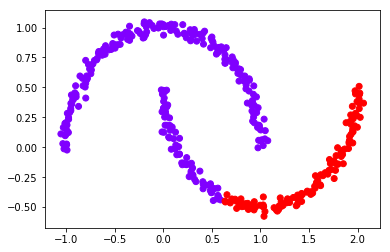

In [8]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_moons(400, noise=0.03)

cluster = AgglomerativeClustering(affinity='euclidean', linkage='average')  

cluster.fit(X)

plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

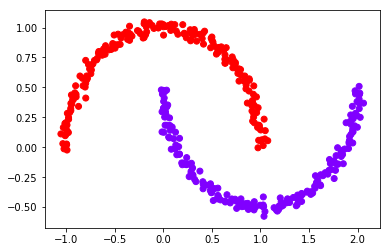

In [9]:
cluster = AgglomerativeClustering(affinity='euclidean', linkage='single')  

cluster.fit(X)

plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

## Density-based
Clustering locates regions of high density that are separated from one another by regions of low density.

# DBSCAN
* Density = # of points within a $B(p, \varepsilon)$
* **core point**: it has at least a specified number of points $M$ within $\varepsilon$, i.e., is the center of some ball
* **border point** is not a core point, but is in the neighborhood of a core point, i.e., is in the ball
* **noise point** is any point that is not a core point nor a border point

### Algorithm
```python
    def DBSCAN(data, M, eps):
        labels = []
        for i in data:
            lb = label(i, M, eps) # as core, border, or noise
            if lb is noise:
                del i
            labels.append(lb)
        clusters = merge_core_point(within=eps, labels, data)
        return assign_border_points(clusters, eps, data, labels)
```        

### Strengths and weaknesses
* Resistant to noise and can handle cluster of arbitrary shape and size
* trouble when the clusters have widely varying densities
* trouble with high-dimensional data
* parameters!

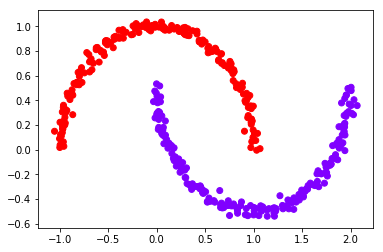

In [11]:
from sklearn.cluster import DBSCAN

X, y = make_moons(400, noise=0.03)

cluster = DBSCAN(eps=0.2, min_samples=10)  

cluster.fit(X)

plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')

## Cluster evaluation
1. Determining the clustering tendency of a set of data, i.e., distinguishing whether non-random structure actually exists in the data.
2. Comparing the results of a cluster analysis to externally known results, e.g., to externally given class labels.
3. Evaluating how well the results of a cluster analysis fit the data without reference to external information.-- Use only the data
4. Comparing the results of two different sets of cluster analyses to determine which is better.
5. Determining the ‘correct’ number of clusters

# Dimensionality Reduction

## The Curse of Dimensionality

It turns out that many things behave very differently in high-dimensional space. 
* If you pick a random point in a unit square (a $1 \times 1$ square), it will have only about a $0.4\%$ chance of being located less than $0.001$ from a border, but in a $10,000-$dimensional unit hypercube (a $1 \times 1 \times\dots\times 1$ cube, with ten thousand 1s), this probability is greater than $99.999999\%$.

* if you pick two points randomly in a unit square, the distance between these two points will be, on average, roughly 0.52. If you pick two random points in a unit 3D cube, the average distance will be roughly 0.66. But what about two points picked randomly in a 1,000,000-dimensional hypercube? Well, the average distance, believe it or not, will be about 408.25


This fact implies that high-dimensional datasets are at risk of being very sparse


Unfortunately, in practice, the number of training instances required to reach a given density grows exponentially with the number of dimensions.

## Main Approaches for Dimensionality Reduction
* Projection
* Manifold Learning

### Projection
training instances are not spread out uniformly across all dimensions. Many features are almost constant, while others are highly correlated As a result, all training instances actually lie within (or close to) a much lower-dimensional subspace of the high-dimensional space

### Manifold learning

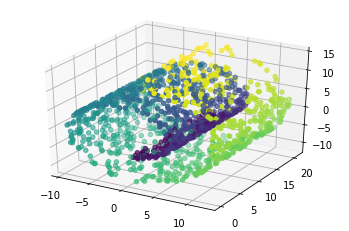

In [14]:
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

X, t = make_swiss_roll(1500)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t)

### Intuitive idea

(200, 2)


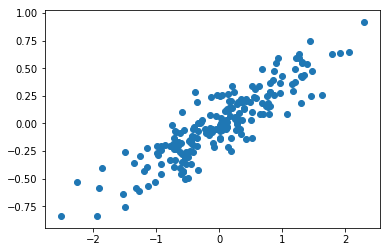

In [16]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T+10

# center data on 0,0
X=X-np.mean(X, axis=0)
print(X.shape)
plt.scatter(X[:,0], X[:,1])

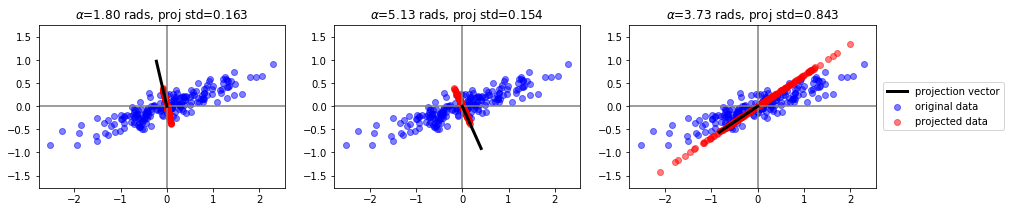

In [18]:
plt.figure(figsize=(15,3))

unit_vector = lambda angle: np.array([np.cos(angle), np.sin(angle)])

for i in range(3):
    plt.subplot(1,3,i+1)
    angle = np.random.random()*np.pi*2 if i!=0 else 1.8
    v = unit_vector(angle)
    c = X @ (v.reshape(-1,1))/(np.linalg.norm(v)**2)
    Xp = np.repeat(v.reshape(-1,2),len(X),axis=0)*c

    plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
    plt.scatter(Xp[:,0], Xp[:,1], color="red", alpha=.5, label="projected data")
    plt.axvline(0, color="gray")
    plt.axhline(0, color="gray")
    plt.plot([0,v[0]], [0,v[1]], color="black", lw=3, label="projection vector")
    plt.axis('equal')
    plt.ylim(-2,2)
    plt.title("$\\alpha$=%.2f rads, proj std=%.3f"%(angle, np.std(c)))
    if i==2:
        plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

### Just brute force

### Preserving the Variance
Variance measures how spread out some data is!

Text(0, 0.5, 'projection std')

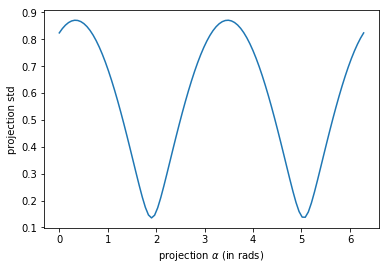

In [19]:
def get_maxmin_projections(X):
    stds = []
    angles = np.linspace(0,np.pi*2, 100)
    for a in angles:
        v = np.array([np.cos(a), np.sin(a)])
        c = X @ (v.reshape(-1,1))/(np.linalg.norm(v)**2)
        stds.append(np.std(c))
    v2 = unit_vector(angles[np.argmin(stds)])
    v1 = unit_vector(angles[np.argmax(stds)])
    
    return angles, stds, v1, v2
angles, stds, v1, v2 = get_maxmin_projections(X)

plt.plot(angles, stds)
plt.xlabel("projection $\\alpha$ (in rads)")
plt.ylabel("projection std")

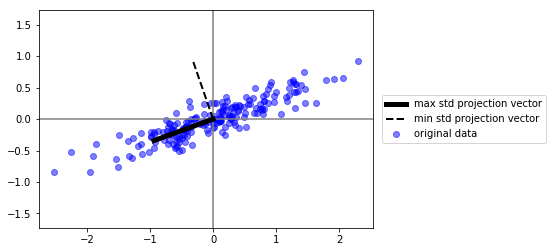

In [20]:
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
plt.axvline(0, color="gray")
plt.axhline(0, color="gray")
plt.plot([0,v1[0]], [0,v1[1]], color="black", lw=5, label="max std projection vector")
plt.plot([0,v2[0]], [0,v2[1]], color="black", ls="--", lw=2, label="min std projection vector")
plt.axis('equal')
plt.ylim(-2,2)
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

## PCA
Principal Component Analysis (PCA) is by far the most popular dimensionality reduction algorithm. First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it.

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1) 
pca.fit(X)
print("sklearn PCA components")
print(pca.components_)
print("brute force components")
print(v1)
print(v2)

sklearn PCA components
[[-0.94446029 -0.32862557]]
brute force components
[-0.93969262 -0.34202014]
[-0.32706796  0.94500082]


In [22]:
c = pca.transform(X)
print(c.shape)

(200, 1)


### PCA for Compression

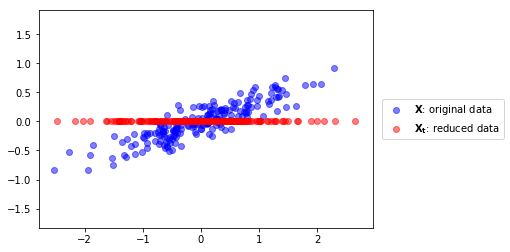

In [23]:
pca = PCA(n_components=1)
pca.fit(X)
Xt = pca.transform(X)[:,0]
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="$\mathbf{X}$: original data")
plt.scatter(Xt, [0]*len(Xt), color="red", alpha=.5, label="$\mathbf{X_t}$: reduced data")
plt.axis("equal");
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

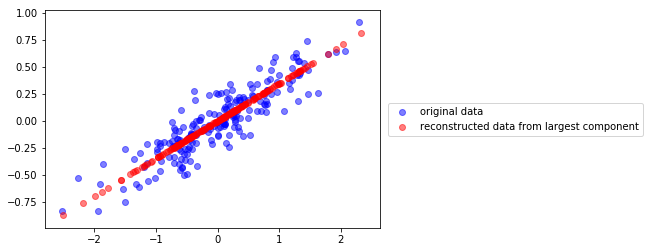

In [24]:
v0 = pca.components_[0]
c = X.dot(v0)
Xr = np.r_[[i*v0 for i in c]]
plt.scatter(X[:,0], X[:,1], color="blue", alpha=.5, label="original data")
plt.scatter(Xr[:,0], Xr[:,1], color="red", alpha=.5, label="reconstructed data from largest component")
plt.legend(loc="center left", bbox_to_anchor=(1.01,.5))

# PCA for Compression

In [25]:
mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values
d=mnist[:,1:785]
c=mnist[:,0]
print(d.shape, c.shape)

(1500, 784) (1500,)


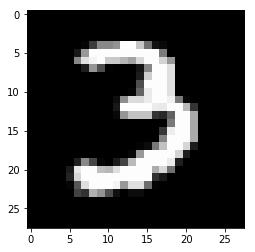

In [26]:
plt.imshow(d[9].reshape(28,28), cmap=plt.cm.gray)

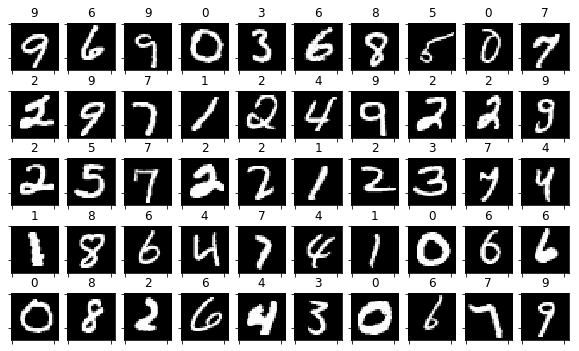

In [27]:
perm = np.random.permutation(range(d.shape[0]))[0:50]
random_imgs   = d[perm]
random_labels = c[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

In [28]:
mnist = pd.read_csv("data/mnist1.5k.csv.gz", compression="gzip", header=None).values

X=mnist[:,1:785]
y=mnist[:,0]

pca = PCA(n_components=60)
Xp = pca.fit_transform(X)

In [29]:
X.shape, y.shape

((1500, 784), (1500,))

In [32]:
from sklearn.model_selection import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=.3)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((1050, 784), (450, 784), (1050,), (450,))

In [41]:
from sklearn.naive_bayes import GaussianNB

dt = GaussianNB()

dt.fit(Xtr, ytr)
dt.score(Xtr, ytr), dt.score(Xts, yts)

(0.6638095238095238, 0.5755555555555556)

In [42]:
from tqdm import tqdm
dtr, dts = [], []
for n_components in tqdm(range(10, 200, 5)):
    pca = PCA(n_components=n_components)
    pca.fit(Xtr)

    Xt_tr = pca.transform(Xtr)
    Xt_ts = pca.transform(Xts)

    dt.fit(Xt_tr,ytr)
    ypreds_tr = dt.predict(Xt_tr)
    ypreds_ts = dt.predict(Xt_ts)
    ypreds_tr.shape, ypreds_ts.shape
    dtr.append(np.mean(ytr==ypreds_tr))
    dts.append(np.mean(yts==ypreds_ts))

100%|██████████| 38/38 [00:18<00:00,  1.50it/s]


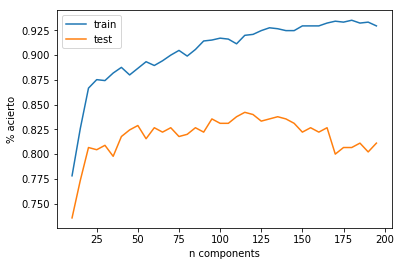

In [43]:
cs = np.arange(10, 200, 5)
plt.plot(cs, dtr, label="train")
plt.plot(cs, dts, label="test")
plt.xlabel("n components")
plt.ylabel("% acierto")
plt.legend()

In [44]:
best_cs = cs[np.argmax(dts)]
best_cs

115

In [45]:
pca = PCA(n_components=best_cs)
pca.fit(Xtr)

Xt_tr = pca.transform(Xtr)
Xt_ts = pca.transform(Xts)
dt.fit(Xt_tr,ytr)
ypreds_tr = dt.predict(Xt_tr)
ypreds_ts = dt.predict(Xt_ts)
ypreds_tr.shape, ypreds_ts.shape
np.mean(ytr==ypreds_tr),np.mean(yts==ypreds_ts)

(0.9171428571428571, 0.8333333333333334)

In [46]:
from sklearn.pipeline import Pipeline

estimator = Pipeline((("pca", PCA(n_components=best_cs)), ("naive", dt)))
estimator.fit(Xtr, ytr)
estimator.score(Xtr, ytr), estimator.score(Xts, yts)

(0.919047619047619, 0.8444444444444444)

In [47]:
from sklearn.model_selection import cross_val_score
pip = Pipeline([("PCA", PCA(n_components=best_cs)), ("gaussian", GaussianNB())])
scores = cross_val_score(pip, X,y, cv=5 )
print("%.2f +/- %.4f"%(np.mean(scores), np.std(scores)))

0.83 +/- 0.0268


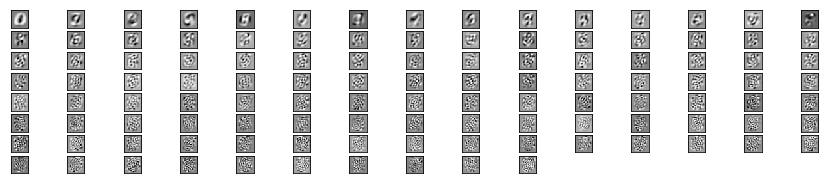

In [48]:
cols=20
plt.figure(figsize=(15,3))
for i in range(len(pca.components_)):
    plt.subplot(np.ceil(len(pca.components_)/15.),15,i+1)
    plt.imshow((pca.components_[i].reshape(28,28)), cmap = plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

In [49]:
pca = PCA(n_components=best_cs)
pca.fit(Xtr)
Xp = pca.transform(X)

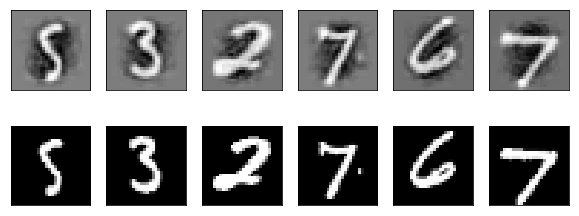

In [50]:
plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(3,6,i+1)
    k = np.random.randint(len(X))
    plt.imshow((np.sum((pca.components_*Xp[k].reshape(-1,1)), axis=0)).reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])
    plt.subplot(3,6,6+i+1)
    plt.imshow(X[k].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])